In [2]:
import pandas as pd
dataset = pd.read_csv('archive/NationalNames.csv')

# Task 1
Output the first 8 rows of the dataset 

In [10]:
dataset[0:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


# Task 2
Output the last 8 rows of the dataset 

In [11]:
dataset[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


# Task 3
Get the names of dataset columns 

In [5]:
dataset.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

# Task 4
Get general information about data in the dataset 

In [8]:
dataset.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


# Task 5
Find the number of unique names in whole dataset 

In [9]:
dataset.nunique()['Name']

93889

# Task 6
the number of unique female and male names in whole dataset 

In [10]:
dataset.groupby('Gender').nunique()['Name']

Gender
F    64911
M    39199
Name: Name, dtype: int64

# Task 7
Find 5 the most popular male names in 2010 

In [11]:
dataset[(dataset['Year'] == 2010) & (dataset['Gender'] == 'M')].sort_values('Count', ascending=False)[0:5]

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


# Task 8
Find the most popular name based on the results of one year (the name for which Count is maximum) 

In [23]:
dataset.sort_values('Count', ascending=False)[0:1]

,Id,Name,Year,Gender,Count
431052,431053,Linda,1947,F,99680


# Task 9
Count the number of records with Count = minimum 

In [12]:
dataset.where(dataset['Count'] == dataset['Count'].min()).count().iloc()[0]

254615

# Task 10
Count the number of unique names in each year

In [24]:
dataset.groupby('Year')[['Name']].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


# Task 11
Find the year with the most number of unique names. 

In [13]:
dataset.groupby('Year').nunique().sort_values('Name', ascending=False)[0:1]

,Id,Name,Year,Gender,Count
Year,,,,,
2008,35045,32488,1,2,1377


# Task 12
Find most popular name of the year with the most number of unique names(that is in 2008) 

In [25]:
dataset[(dataset.Year == 2008)].sort_values('Count', ascending=False)[0:1].iloc()[0]

Id        1608303
Name        Jacob
Year         2008
Gender          M
Count       22568
Name: 1608302, dtype: object

# Task 13
Find the year when the name “Jacob” was the most popular as a female name 

In [14]:
dataset[(dataset.Name == 'Jacob') & (dataset.Gender == 'F')].sort_values('Count', ascending=False)[0:1]

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


# Task 14
Find year, with the most number of gender neutral names (the same male and female names)

In [26]:
dataset.groupby(['Year', 'Name', 'Gender']).sum().unstack().dropna().groupby(['Year']).count().unstack().max()

2557

# Task 15
Find total births per year 

In [15]:
dataset.groupby('Year').sum()['Count']

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

# Task 16
Find the year when the greatest number of children was born

In [3]:
dataset.groupby('Year').sum().index[dataset.groupby('Year').sum().Count == dataset.groupby('Year').sum().max().Count].tolist()[0]

1957

# Task 17
Find the number of girls and boys that were born in each year 

In [16]:
dataset.groupby(['Year', 'Gender'])['Count'].sum().unstack()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


# Task 18
Count the number of years when more girls were born than boys 

In [33]:
table = dataset.groupby(['Year', 'Gender'])['Count'].sum().unstack()
table[table.F > table.M].count()

Gender
F    54
M    54
dtype: int64

# Task 19
Draw the plot of total births per year of boys and girls 

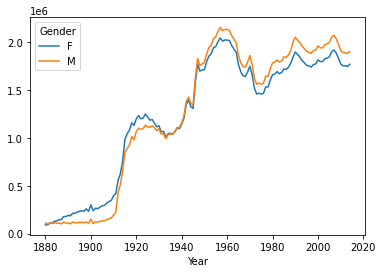

In [29]:
df = dataset.groupby(['Year', 'Gender'])['Count'].sum().unstack()
df.plot()

# Task 20
Count number of gender neutral names (same for girls and boys) 

In [19]:
dataset.groupby(['Name', 'Gender']).sum().unstack().dropna().count()['Count']

Gender
F    10221
M    10221
dtype: int64

# Task 21
Count how much times boys were named as Barbara 

In [20]:
dataset[(dataset.Name == 'Barbara') & (dataset.Gender == 'M')]['Count'].sum()

4139

# Additional Tasks

In [18]:

print("The number of people with name 'Nazar' was born in 2001 - ", dataset[(dataset.Name == 'Nazar') & (dataset.Year == 2001)].groupby(['Year', 'Gender'])['Count'].sum().unstack().sum().sum())

The number of people with name 'Nazar' was born in 2001 -  12


In [21]:
print("The total number of people with named Nazar is ",dataset[(dataset.Name == 'Nazar')].groupby(['Year', 'Gender'])['Count'].sum().unstack().sum().sum())

The total number of people with named Nazar is  320


In [22]:
print("The total number of people named Nazareth",dataset[(dataset.Name == 'Nazareth')].groupby(['Year', 'Gender'])['Count'].sum().unstack().sum().sum())

The total number of people named Nazareth   1156.0
